## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

from utils import get_data

%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

## Import data

In [2]:
# sample_submission = pd.read_csv("/home/levcsi/IPCV/DMaML/assignment/data/sample_submission.csv")
X_train = pd.read_csv("./data/X_train.csv")
Y_train = pd.read_csv("./data/Y_train.csv")
X_test = pd.read_csv("./data/X_test.csv")

## Investigate data

In [3]:
X_train.head()

,Condition_importance,Admission_type,Marital_status,Ethnicity,Hospital_death_flag,Gender,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total","Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Glucose,H,Hematocrit,Hemoglobin,I,INR(PT),L,MCH,MCHC,MCV,Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,RDW,RDW-SD,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2
0,4,EW EMER.,MARRIED,WHITE,0.0,M,56,NaN,NaN,13.0,NaN,1.0,26.0,NaN,9.0,26.0,105.0,1.1,94.0,NaN,39.8,13.8,NaN,1.1,NaN,31.8,34.6,92.0,1.9,12.1,24.1,3.3,167.0,4.3,13.0,NaN,4.34,140.0,17.0,10.9,40.0,5.50,539.0
1,7,DIRECT EMER.,SINGLE,WHITE,0.0,M,46,215.0,195.0,14.0,341.0,NaN,22.0,0.5,9.5,NaN,105.0,1.3,471.0,NaN,38.6,12.5,NaN,1.1,NaN,33.0,32.5,101.0,1.9,13.2,27.8,3.3,417.0,4.7,19.3,NaN,3.80,136.0,21.0,6.5,NaN,6.50,NaN
2,1,DIRECT EMER.,WIDOWED,WHITE,0.0,M,69,NaN,158.0,18.0,11.0,NaN,22.0,0.3,9.7,NaN,98.0,3.1,388.0,1.0,26.4,8.3,1.0,1.1,4.0,31.1,31.4,99.0,1.6,12.2,90.3,3.8,260.0,5.8,14.6,53.4,2.67,138.0,37.0,8.6,NaN,NaN,NaN
3,10,OBSERVATION ADMIT,MARRIED,WHITE,0.0,M,76,43.0,94.0,12.0,72.0,0.0,24.0,0.4,8.9,23.0,118.0,0.9,1000.0,41.0,44.0,13.4,1.0,1.1,4.0,27.7,30.5,91.0,2.1,11.8,24.6,3.2,184.0,3.1,14.2,47.8,4.84,134.0,21.0,8.3,33.0,7.44,321.0
4,8,EW EMER.,WIDOWED,WHITE,0.0,F,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(X_train.shape)
print(list(X_train.columns))

(3696245, 43)
['Condition_importance', 'Admission_type', 'Marital_status', 'Ethnicity', 'Hospital_death_flag', 'Gender', 'Age', 'Alanine Aminotransferase (ALT)', 'Alkaline Phosphatase', 'Anion Gap', 'Asparate Aminotransferase (AST)', 'Base Excess', 'Bicarbonate', 'Bilirubin, Total', 'Calcium, Total', 'Calculated Total CO2', 'Chloride', 'Creatinine', 'Glucose', 'H', 'Hematocrit', 'Hemoglobin', 'I', 'INR(PT)', 'L', 'MCH', 'MCHC', 'MCV', 'Magnesium', 'PT', 'PTT', 'Phosphate', 'Platelet Count', 'Potassium', 'RDW', 'RDW-SD', 'Red Blood Cells', 'Sodium', 'Urea Nitrogen', 'White Blood Cells', 'pCO2', 'pH', 'pO2']


In [5]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696245 entries, 0 to 3696244
Data columns (total 43 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Condition_importance             int64  
 1   Admission_type                   object 
 2   Marital_status                   object 
 3   Ethnicity                        object 
 4   Hospital_death_flag              float64
 5   Gender                           object 
 6   Age                              int64  
 7   Alanine Aminotransferase (ALT)   float64
 8   Alkaline Phosphatase             float64
 9   Anion Gap                        float64
 10  Asparate Aminotransferase (AST)  float64
 11  Base Excess                      float64
 12  Bicarbonate                      float64
 13  Bilirubin, Total                 float64
 14  Calcium, Total                   float64
 15  Calculated Total CO2             float64
 16  Chloride                         float64
 17  Creatini

In [6]:
X_train.describe()

,Condition_importance,Hospital_death_flag,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total","Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Glucose,H,Hematocrit,Hemoglobin,I,INR(PT),L,MCH,MCHC,MCV,Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,RDW,RDW-SD,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2
count,3.696245e+06,3.696242e+06,3.696245e+06,1.613112e+06,1.590535e+06,2.987218e+06,1.619231e+06,833198.000000,2.987437e+06,1.743361e+06,2.788963e+06,833211.000000,3.000884e+06,3.000989e+06,2.953849e+06,1.142935e+06,3.105862e+06,3.064917e+06,1.142933e+06,2.182872e+06,1.142938e+06,3.059801e+06,3.059859e+06,3.059870e+06,2.823360e+06,2.182800e+06,2.111802e+06,2.777375e+06,3.076581e+06,3.013123e+06,3.059539e+06,1.384703e+06,3.059876e+06,3.003666e+06,2.984892e+06,3.061683e+06,832918.000000,1.638669e+06,833032.000000
mean,8.171990e+00,3.689044e-02,5.867240e+01,6.318734e+01,1.265463e+02,1.443721e+01,8.280097e+01,-0.627479,2.475878e+01,1.737754e+00,8.726072e+00,25.711781,1.023172e+02,1.479535e+00,1.532330e+02,2.772640e+01,3.392738e+01,1.115006e+01,1.582377e+00,1.462208e+00,1.096764e+01,2.986931e+01,3.274977e+01,9.121676e+01,1.957353e+00,1.619549e+01,3.478842e+01,3.646147e+00,2.270144e+02,4.165721e+00,1.513232e+01,5.037892e+01,3.734597e+00,1.384740e+02,2.495795e+01,9.536272e+00,42.037929,6.601344e+00,151.544611
std,6.515884e+00,1.884928e-01,2.143451e+01,2.445916e+02,1.390357e+02,3.639728e+00,3.779610e+02,6.764076,4.055466e+00,3.254600e+00,7.467897e-01,5.714947,5.474581e+00,1.690309e+00,3.714502e+03,7.285227e+01,6.520443e+00,2.291368e+00,3.195576e+00,7.377535e-01,1.799241e+01,3.046443e+00,1.634788e+00,7.879276e+00,3.542202e-01,8.824718e+00,1.356778e+01,1.127202e+00,1.116882e+02,5.807374e-01,2.307726e+00,2.028439e+01,7.438899e-01,4.166033e+00,2.022760e+01,1.431711e+01,10.238999,8.568754e-01,114.517318
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-4.000000e+00,0.000000e+00,-413.000000,3.000000e+00,0.000000e+00,1.800000e+00,0.000000,7.500000e+01,0.000000e+00,2.000000e+00,0.000000e+00,8.300000e+00,0.000000e+00,0.000000e+00,6.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01,5.800000e+00,1.600000e+01,4.000000e-01,5.000000e+00,1.600000e+00,0.000000e+00,2.930000e+01,0.000000e+00,9.700000e+01,1.000000e+00,1.000000e-01,10.000000,1.000000e+00,0.000000
25%,3.000000e+00,0.000000e+00,4.800000e+01,1.400000e+01,6.600000e+01,1.200000e+01,1.900000e+01,-3.000000,2.200000e+01,3.000000e-01,8.300000e+00,22.000000,9.900000e+01,7.000000e-01,9.300000e+01,3.000000e+00,2.940000e+01,9.500000e+00,1.000000e+00,1.100000e+00,6.000000e+00,2.830000e+01,3.170000e+01,8.700000e+01,1.800000e+00,1.190000e+01,2.770000e+01,3.000000e+00,1.580000e+02,3.800000e+00,1.350000e+01,4.430000e+01,3.220000e+00,1.360000e+02,1.300000e+01,6.000000e+00,35.000000,6.000000e+00,70.000000
50%,6.000000e+00,0.000000e+00,6.200000e+01,2.200000e+01,8.900000e+01,1.400000e+01,2.800000e+01,0.000000,2.500000e+01,6.000000e-01,8.700000e+00,26.000000,1.030000e+02,1.000000e+00,1.100000e+02,8.000000e+00,3.380000e+01,1.110000e+01,1.000000e+00,1.200000e+00,8.000000e+00,3.000000e+01,3.280000e+01,9.100000e+01,1.900000e+00,1.330000e+01,3.090000e+01,3.500000e+00,2.120000e+02,4.100000e+00,1.460000e+01,4.830000e+01,3.740000e+00,1.390000e+02,1.900000e+01,8.200000e+00,41.000000,6.500000e+00,106.000000
75%,1.100000e+01,0.000000e+00,7.400000e+01,4.200000e+01,1.320000e+02,1.600000e+01,5.100000e+01,2.000000,2.700000e+01,1.300000e+00,9.200000e+00,29.000000,1.060000e+02,1.400000e+00,1.430000e+02,1.900000e+01,3.810000e+01,1.260000e+01,1.000000e+00,1.500000e+00,1.200000e+01,3.160000e+01,3.380000e+01,9.600000e+01,2.100000e+00,1.620000e+01,3.640000e+01,4.100000e+00,2.770000e+02,4.500000e+00,1.620000e+01,5.430000e+01,4.240000e+00,1.410000e+02,3.000000e+01,1.130000e+01,47.000000,7.370000e+00,201.000000
max,3.900000e+01,1.000000e+00,9.100000e+01,1.235400e+04,4.1

In [7]:
X_train.isna().sum()

Condition_importance                     0
Admission_type                           3
Marital_status                      239549
Ethnicity                                3
Hospital_death_flag                      3
Gender                                   0
Age                                      0
Alanine Aminotransferase (ALT)     2083133
Alkaline Phosphatase               2105710
Anion Gap                           709027
Asparate Aminotransferase (AST)    2077014
Base Excess                        2863047
Bicarbonate                         708808
Bilirubin, Total                   1952884
Calcium, Total                      907282
Calculated Total CO2               2863034
Chloride                            695361
Creatinine                          695256
Glucose                             742396
H                                  2553310
Hematocrit                          590383
Hemoglobin                          631328
I                                  2553312
INR(PT)    

In [46]:
100 * X_train.isnull().sum() / len(X_train)

Condition_importance                0.000000
Admission_type                      0.000081
Marital_status                      6.480875
Ethnicity                           0.000081
Hospital_death_flag                 0.000081
Gender                              0.000000
Age                                 0.000000
Alanine Aminotransferase (ALT)     56.358088
Alkaline Phosphatase               56.968897
Anion Gap                          19.182359
Asparate Aminotransferase (AST)    56.192541
Base Excess                        77.458258
Bicarbonate                        19.176434
Bilirubin, Total                   52.834268
Calcium, Total                     24.546046
Calculated Total CO2               77.457907
Chloride                           18.812633
Creatinine                         18.809792
Glucose                            20.085140
H                                  69.078484
Hematocrit                         15.972507
Hemoglobin                         17.080253
I         

In [3]:
100 * X_test.isnull().sum() / len(X_test)

Condition_importance                0.000000
Admission_type                      0.000063
Marital_status                      6.510486
Ethnicity                           0.000063
Hospital_death_flag                 0.000063
Gender                              0.000000
Age                                 0.000000
Alanine Aminotransferase (ALT)     56.310941
Alkaline Phosphatase               56.923590
Anion Gap                          19.145941
Asparate Aminotransferase (AST)    56.151167
Base Excess                        77.525052
Bicarbonate                        19.140575
Bilirubin, Total                   52.767239
Calcium, Total                     24.514584
Calculated Total CO2               77.523853
Chloride                           18.776332
Creatinine                         18.767178
Glucose                            20.046954
H                                  69.080478
Hematocrit                         15.938832
Hemoglobin                         17.045261
I         

In [53]:
X_train.min()

/tmp/ipykernel_18611/1517305492.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.min()


Condition_importance                   1
Hospital_death_flag                  0.0
Gender                                 F
Age                                    0
Alanine Aminotransferase (ALT)       0.0
Alkaline Phosphatase                 1.0
Anion Gap                           -4.0
Asparate Aminotransferase (AST)      0.0
Base Excess                       -413.0
Bicarbonate                          3.0
Bilirubin, Total                     0.0
Calcium, Total                       1.8
Calculated Total CO2                 0.0
Chloride                            75.0
Creatinine                           0.0
Glucose                              2.0
H                                    0.0
Hematocrit                           8.3
Hemoglobin                           0.0
I                                    0.0
INR(PT)                              0.6
L                                    0.0
MCH                                  0.0
MCHC                                 0.0
MCV             

In [4]:
X_test.min()

/tmp/ipykernel_28658/2922107183.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.min()


Condition_importance                   1
Hospital_death_flag                  0.0
Gender                                 F
Age                                    0
Alanine Aminotransferase (ALT)       0.0
Alkaline Phosphatase                 1.0
Anion Gap                           -4.0
Asparate Aminotransferase (AST)      0.0
Base Excess                       -413.0
Bicarbonate                          3.0
Bilirubin, Total                     0.0
Calcium, Total                       1.8
Calculated Total CO2                 0.0
Chloride                            75.0
Creatinine                           0.0
Glucose                              1.0
H                                    0.0
Hematocrit                           8.3
Hemoglobin                           0.0
I                                    0.0
INR(PT)                              0.6
L                                    0.0
MCH                                  0.0
MCHC                                 0.0
MCV             

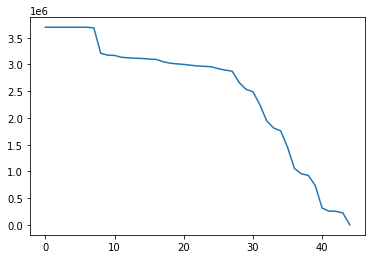

In [12]:
y = list()
for i in range(45):
    #print(i)
    X_train_dnt = X_train.dropna(thresh=i)
    y.append(len(X_train_dnt))
    # print(len(X_train_dnt))
    # print()

plt.plot(list(range(45)), y)

In [13]:
X_train_dnt = X_train.dropna(thresh=26)
X_train_dnt.min()

/tmp/ipykernel_28658/3776907597.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train_dnt.min()


Condition_importance                                           1
Admission_type                            AMBULATORY OBSERVATION
Ethnicity                          AMERICAN INDIAN/ALASKA NATIVE
Hospital_death_flag                                          0.0
Gender                                                         F
Age                                                            0
Alanine Aminotransferase (ALT)                               0.0
Alkaline Phosphatase                                         1.0
Anion Gap                                                   -4.0
Asparate Aminotransferase (AST)                              0.0
Base Excess                                               -413.0
Bicarbonate                                                  3.0
Bilirubin, Total                                             0.0
Calcium, Total                                               1.8
Calculated Total CO2                                         0.0
Chloride                 

In [9]:
X_train.pO2.dropna()

0          539.0
3          321.0
6          305.0
7          143.0
8          187.0
           ...  
3696233    224.0
3696235     62.0
3696241     81.0
3696242     43.0
3696244     78.0
Name: pO2, Length: 833032, dtype: float64

In [10]:
X_train.dropna()

,Condition_importance,Admission_type,Marital_status,Ethnicity,Hospital_death_flag,Gender,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total","Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Glucose,H,Hematocrit,Hemoglobin,I,INR(PT),L,MCH,MCHC,MCV,Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,RDW,RDW-SD,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2
3,10,OBSERVATION ADMIT,MARRIED,WHITE,0.0,M,76,43.0,94.0,12.0,72.0,0.0,24.0,0.4,8.9,23.0,118.0,0.9,1000.0,41.0,44.0,13.4,1.0,1.1,4.0,27.7,30.5,91.0,2.1,11.8,24.6,3.2,184.0,3.1,14.2,47.8,4.84,134.0,21.0,8.3,33.0,7.44,321.0
21,16,EW EMER.,WIDOWED,WHITE,0.0,F,71,20.0,275.0,19.0,20.0,0.0,23.0,0.4,7.6,28.0,95.0,2.9,198.0,64.0,38.0,10.6,1.0,4.9,8.0,22.8,27.9,82.0,2.1,53.0,37.9,7.1,204.0,5.7,19.9,57.6,4.64,142.0,78.0,8.5,54.0,7.30,100.0
22,5,URGENT,MARRIED,WHITE,0.0,M,80,15.0,51.0,13.0,22.0,0.0,22.0,1.1,9.1,25.0,108.0,1.4,103.0,11.0,39.5,12.5,1.0,1.3,6.0,29.6,31.6,93.0,2.0,14.3,44.5,3.7,198.0,4.2,15.0,51.8,4.23,143.0,20.0,8.6,42.0,6.00,431.0
23,5,OBSERVATION ADMIT,MARRIED,WHITE,0.0,M,52,6.0,69.0,15.0,17.0,-4.0,19.0,1.3,8.3,22.0,104.0,1.5,130.0,3.0,25.7,8.4,2.0,1.4,9.0,30.2,32.7,92.0,2.0,15.8,38.4,4.3,96.0,4.3,15.2,51.1,2.78,136.0,18.0,5.3,40.0,7.33,108.0
29,23,OBSERVATION ADMIT,SINGLE,WHITE,0.0,F,52,84.0,86.0,18.0,385.0,-7.0,22.0,0.8,9.0,18.0,103.0,0.8,150.0,20.0,36.5,12.4,1.0,1.1,9.0,29.7,34.0,87.0,1.6,11.9,28.7,2.4,173.0,3.9,12.4,39.2,4.18,139.0,19.0,10.8,31.0,6.00,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696150,27,OBSERVATION ADMIT,MARRIED,WHITE,0.0,M,68,19.0,82.0,16.0,20.0,-4.0,17.0,0.2,8.3,19.0,105.0,1.8,84.0,4.0,25.5,8.2,0.0,1.2,13.0,28.5,32.2,89.0,2.4,13.5,25.5,3.9,482.0,4.9,14.6,47.2,2.88,141.0,70.0,15.3,29.0,7.41,73.0
3696178,13,URGENT,SINGLE,WHITE,0.0,F,64,8.0,140.0,15.0,7.0,3.0,27.0,0.4,9.3,30.0,93.0,0.5,1000.0,0.0,27.7,9.0,1.0,1.6,6.0,30.4,32.5,94.0,1.5,17.1,32.3,2.6,385.0,4.0,12.8,43.7,2.96,135.0,12.0,15.3,45.0,7.42,39.0
3696191,9,OBSERVATION ADMIT,SINGLE,OTHER,1.0,F,81,46.0,120.0,15.0,60.0,-13.0,10.0,0.3,8.2,16.0,97.0,3.3,85.0,6.0,36.3,10.8,0.0,1.5,7.0,25.8,29.8,87.0,2.9,16.0,45.3,9.8,546.0,5.6,14.6,46.1,4.18,138.0,109.0,22.8,38.0,5.50,66.0
3696229,13,EW EMER.,MARRIED,ASIAN,1.0,M,55,96.0,346.0,9.0,218.0,-8.0,16.0,25.8,8.9,18.0,102.0,1.3,204.0,75.0,28.3,9.3,30.0,2.5,14.0,33.9,32.9,103.0,2.1,27.4,34.4,4.5,186.0,4.7,21.6,81.0,2.74,130.0,59.0,22.6,37.0,7.28,63.0


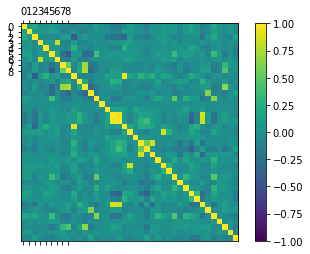

In [11]:
correlations = X_train.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(list(X_train.columns))
#ax.set_yticklabels(list(X_train.columns))
plt.show()

In [12]:
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Condition_importance,Hospital_death_flag,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total","Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Glucose,H,Hematocrit,Hemoglobin,I,INR(PT),L,MCH,MCHC,MCV,Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,RDW,RDW-SD,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2
Condition_importance,1.000000,0.141312,0.220588,0.014099,0.033580,0.093942,0.028336,-0.014563,-0.067214,-0.120416,-0.062122,-0.015333,-0.081486,0.114241,0.007146,-0.051850,-0.154226,-0.184473,-0.066541,0.089512,-0.002111,-0.048624,-0.161664,0.036199,0.010833,0.091272,0.043677,0.074664,-0.050888,0.061313,0.160610,0.066013,-0.158888,-0.044072,0.186540,0.020433,-0.001377,0.047935,-0.069569
Hospital_death_flag,0.141312,1.000000,0.093238,0.084291,0.060105,0.128802,0.119137,-0.135363,-0.113025,0.060294,-0.089058,-0.123381,-0.019990,0.043952,0.000744,0.002619,-0.058908,-0.071419,0.109121,0.084612,0.036351,0.017763,-0.057739,0.055582,0.032399,0.085027,0.076811,0.098496,-0.045764,0.044322,0.113869,0.052742,-0.076710,-0.026167,0.120311,0.054620,-0.022230,0.072163,-0.051742
Age,0.220588,0.093238,1.000000,-0.042005,-0.032430,-0.026597,-0.032257,0.097248,0.094837,-0.409338,-0.010641,0.075095,-0.012788,0.002353,-0.003295,-0.159531,-0.224703,-0.243273,-0.326867,0.106240,-0.079970,-0.100123,-0.127814,-0.039890,0.048131,0.099373,0.029179,-0.083348,-0.072241,0.006074,-0.002164,0.000035,-0.191133,0.042481,0.202960,-0.016176,-0.039275,-0.092341,0.131110
Alanine Aminotransferase (ALT),0.014099,0.084291,-0.042005,1.000000,0.090187,0.121516,0.824792,-0.090244,-0.089905,0.108073,-0.074344,-0.104572,-0.011172,0.029147,-0.000590,0.011624,0.048768,0.051708,0.099003,0.116338,0.033892,0.016603,0.020629,0.008094,0.026577,0.115942,0.025695,0.084065,-0.047704,0.034780,-0.014558,-0.003999,0.040816,-0.009414,0.032990,0.039651,-0.030173,0.036760,-0.015570
Alkaline Phosphatase,0.033580,0.060105,-0.032430,0.090187,1.000000,0.043581,0.076269,-0.049802,-0.046964,0.287186,-0.011832,-0.052101,-0.083933,0.015661,0.000097,-0.018381,-0.073019,-0.086104,0.257573,0.035965,0.037359,0.015155,-0.056093,0.050643,0.007498,0.034054,0.022655,0.020726,0.049091,0.026122,0.177173,0.062623,-0.089027,-0.106856,0.029219,0.032336,-0.030310,-0.008708,-0.115873
Anion Gap,0.093942,0.128802,-0.026597,0.121516,0.043581,1.000000,0.154931,-0.260047,-0.422075,0.056310,0.069440,-0.308046,-0.274380,0.407829,0.005053,0.064525,0.083197,0.050234,0.056876,0.052142,0.046627,-0.009435,-0.069863,0.029975,0.100933,0.058059,0.047257,0.359512,0.068723,0.137981,0.074305,0.020342,0.068953,-0.093675,0.366226,0.118982,-0.179880,0.018127,-0.135269
Asparate Aminotransferase (AST),0.028336,0.119137,-0.032257,0.824792,0.076269,0.154931,1.000000,-0.111284,-0.111942,0.108664,-0.094616,-0.123531,-0.019635,0.037794,-0.000493,0.015405,0.023464,0.025007,0.105030,0.132383,0.051662,0.025702,0.007532,0.026278,0.024022,0.130968,0.052417,0.111986,-0.057219,0.044387,0.011450,0.006953,0.011130,-0.017101,0.038605,0.047326,-0.036513,0.044328,-0.011543
Base Excess,-0.014563,-0.135363,0.097248,-0.090244,-0.049802,-0.260047,-0.111284,1.000000,0.542175,-0.087204,0.143080,0.705190,-0.206088,-0.137625,-0.012961,-0.025634,0.017721,0.022199,-0.059856,-0.041814,-0.040824,-0.074111,-0.021917,-0.073580,0.023634,-0.045629,-0.084989,-0.180425,0.035981,-0.096243,-0.024266,-0.028661,0.050094,0.061511,-0.141845,-0.077166,0.325650,0.070406,0.034012
Bicarbonate,-0.067214,-0.113025,0.094837,-0.089905,-0.046964,-0.422075,-0.111942,0.542175,1.000000,-0.116332,0.218646,0.759146,-0.308800,-0.136576,-0.007504,-0.084202,0.099345,0.083798,-0.091838,-0.005636,-0.061078,-0.050480,-0.008379,-0.053355,0.064214,-0.013578,-0.039708,-0.108471,0.050953,-0.158842,-0.055283,-0.017190,0.118604,0.132507,-0.183456,-0.110432,0.454498,-0.014278,0.040583
"Bilirubin, Total",-0.120416,0.060294,-0.409338,0.108073,0.287186,0.056310,0.108664,-0.087204,-0

In [13]:
s = corr.unstack()
so = s.sort_values(kind="quicksort")
so

Anion Gap         Bicarbonate        -0.422075
Bicarbonate       Anion Gap          -0.422075
Age               Bilirubin, Total   -0.409338
Bilirubin, Total  Age                -0.409338
RDW               Hemoglobin         -0.377307
                                        ...   
MCV               MCV                 1.000000
MCHC              MCHC                1.000000
MCH               MCH                 1.000000
I                 I                   1.000000
pO2               pO2                 1.000000
Length: 1521, dtype: float64

In [14]:
threshold = 0.8
used_c = list()

for c1 in corr.columns:
    used_c.append(c1)
    for c2 in corr[c1].keys():
        if abs(corr[c1][c2]) > threshold and c2 not in used_c:
            print("{} - {} - {}".format(corr[c1][c2], c1, c2))


0.8247919798613932 - Alanine Aminotransferase (ALT) - Asparate Aminotransferase (AST)
0.9442176168836112 - Bilirubin, Total - I
0.9473966036178375 - Hematocrit - Hemoglobin
0.8903556019815742 - Hematocrit - Red Blood Cells
0.8461890612266207 - Hemoglobin - Red Blood Cells
0.8550011138126611 - INR(PT) - PT
0.8669132117173923 - MCH - MCV


## Y_train

In [15]:
print(Y_train.head())
Y_train.shape

                                            TARGET
0   diseases of the blood and blood-forming organs
1               diseases of the circulatory system
2               diseases of the circulatory system
3      symptoms, signs, and ill-defined conditions
4  diseases of the nervous system and sense organs


(3696245, 1)

In [16]:
print(Y_train.TARGET.unique())
len(Y_train.TARGET.unique())

['diseases of the blood and blood-forming organs'
 'diseases of the circulatory system'
 'symptoms, signs, and ill-defined conditions'
 'diseases of the nervous system and sense organs'
 'diseases of the digestive system' 'diseases of the respiratory system'
 'mental disorders'
 'external causes of injury and supplemental classification'
 'endocrine, nutritional and metabolic diseases, and immunity disorders'
 'factors influencing health status and contact with health services'
 'injury and poisoning' 'diseases of the genitourinary system'
 'diseases of the musculoskeletal system and connective tissue'
 'infectious and parasitic diseases'
 'diseases of the skin and subcutaneous tissue'
 'complications of pregnancy, childbirth, and the puerperium'
 'congenital anomalies' 'neoplasms'
 'certain conditions originating in the perinatal period']


19

In [17]:
Y_train.TARGET.value_counts()

diseases of the circulatory system                                       551552
external causes of injury and supplemental classification                510078
endocrine, nutritional and metabolic diseases, and immunity disorders    412131
factors influencing health status and contact with health services       292710
symptoms, signs, and ill-defined conditions                              256410
mental disorders                                                         240876
diseases of the digestive system                                         231535
diseases of the nervous system and sense organs                          171754
diseases of the genitourinary system                                     166967
diseases of the musculoskeletal system and connective tissue             140861
diseases of the respiratory system                                       133526
injury and poisoning                                                     127693
diseases of the blood and blood-forming 

In [18]:
targets = Y_train.TARGET.unique()
target_map = {targets[i]: i for i in range(len(targets))}
target_map

{'diseases of the blood and blood-forming organs': 0,
 'diseases of the circulatory system': 1,
 'symptoms, signs, and ill-defined conditions': 2,
 'diseases of the nervous system and sense organs': 3,
 'diseases of the digestive system': 4,
 'diseases of the respiratory system': 5,
 'mental disorders': 6,
 'external causes of injury and supplemental classification': 7,
 'endocrine, nutritional and metabolic diseases, and immunity disorders': 8,
 'factors influencing health status and contact with health services': 9,
 'injury and poisoning': 10,
 'diseases of the genitourinary system': 11,
 'diseases of the musculoskeletal system and connective tissue': 12,
 'infectious and parasitic diseases': 13,
 'diseases of the skin and subcutaneous tissue': 14,
 'complications of pregnancy, childbirth, and the puerperium': 15,
 'congenital anomalies': 16,
 'neoplasms': 17,
 'certain conditions originating in the perinatal period': 18}

## Train with target

In [19]:
Admission_types = X_train.Admission_type.unique()
Admission_type_map = {Admission_types[i]: i for i in range(len(Admission_types))}
Admission_type_map

{'EW EMER.': 0,
 'DIRECT EMER.': 1,
 'OBSERVATION ADMIT': 2,
 'URGENT': 3,
 'EU OBSERVATION': 4,
 'AMBULATORY OBSERVATION': 5,
 'SURGICAL SAME DAY ADMISSION': 6,
 'ELECTIVE': 7,
 'DIRECT OBSERVATION': 8,
 nan: 9}

In [20]:
Marital_statuses = X_train.Marital_status.unique()
Marital_status_map = {Marital_statuses[i]: i for i in range(len(Marital_statuses))}
Marital_status_map

{'MARRIED': 0, 'SINGLE': 1, 'WIDOWED': 2, 'DIVORCED': 3, nan: 4}

In [21]:
Ethnicities = X_train.Ethnicity.unique()
Ethnicity_map = {Ethnicities[i]: i for i in range(len(Ethnicities))}
Ethnicity_map

{'WHITE': 0,
 'BLACK/AFRICAN AMERICAN': 1,
 'HISPANIC/LATINO': 2,
 'OTHER': 3,
 'ASIAN': 4,
 'UNABLE TO OBTAIN': 5,
 'UNKNOWN': 6,
 'AMERICAN INDIAN/ALASKA NATIVE': 7,
 nan: 8}

In [22]:
Genders = X_train.Gender.unique()
Gender_map = {Genders[i]: i for i in range(len(Genders))}
Gender_map

{'M': 0, 'F': 1}

In [23]:
XY_train = X_train.join(Y_train["TARGET"])
XY_train['Admission_type_NUM'] = XY_train['Admission_type'].map(Admission_type_map)
XY_train['Marital_status_NUM'] = XY_train['Marital_status'].map(Marital_status_map)
XY_train['Ethnicity_NUM'] = XY_train['Ethnicity'].map(Ethnicity_map)
XY_train['Gender_NUM'] = XY_train['Gender'].map(Gender_map)
XY_train['TARGET_NUM'] = XY_train['TARGET'].map(target_map)
XY_train.head()

,Condition_importance,Admission_type,Marital_status,Ethnicity,Hospital_death_flag,Gender,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total","Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Glucose,H,Hematocrit,Hemoglobin,I,INR(PT),L,MCH,MCHC,MCV,Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,RDW,RDW-SD,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2,TARGET,Admission_type_NUM,Marital_status_NUM,Ethnicity_NUM,Gender_NUM,TARGET_NUM
0,4,EW EMER.,MARRIED,WHITE,0.0,M,56,NaN,NaN,13.0,NaN,1.0,26.0,NaN,9.0,26.0,105.0,1.1,94.0,NaN,39.8,13.8,NaN,1.1,NaN,31.8,34.6,92.0,1.9,12.1,24.1,3.3,167.0,4.3,13.0,NaN,4.34,140.0,17.0,10.9,40.0,5.50,539.0,diseases of the blood and blood-forming organs,0,0,0,0,0
1,7,DIRECT EMER.,SINGLE,WHITE,0.0,M,46,215.0,195.0,14.0,341.0,NaN,22.0,0.5,9.5,NaN,105.0,1.3,471.0,NaN,38.6,12.5,NaN,1.1,NaN,33.0,32.5,101.0,1.9,13.2,27.8,3.3,417.0,4.7,19.3,NaN,3.80,136.0,21.0,6.5,NaN,6.50,NaN,diseases of the circulatory system,1,1,0,0,1
2,1,DIRECT EMER.,WIDOWED,WHITE,0.0,M,69,NaN,158.0,18.0,11.0,NaN,22.0,0.3,9.7,NaN,98.0,3.1,388.0,1.0,26.4,8.3,1.0,1.1,4.0,31.1,31.4,99.0,1.6,12.2,90.3,3.8,260.0,5.8,14.6,53.4,2.67,138.0,37.0,8.6,NaN,NaN,NaN,diseases of the circulatory system,1,2,0,0,1
3,10,OBSERVATION ADMIT,MARRIED,WHITE,0.0,M,76,43.0,94.0,12.0,72.0,0.0,24.0,0.4,8.9,23.0,118.0,0.9,1000.0,41.0,44.0,13.4,1.0,1.1,4.0,27.7,30.5,91.0,2.1,11.8,24.6,3.2,184.0,3.1,14.2,47.8,4.84,134.0,21.0,8.3,33.0,7.44,321.0,"symptoms, signs, and ill-defined conditions",2,0,0,0,2
4,8,EW EMER.,WIDOWED,WHITE,0.0,F,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diseases of the nervous system and sense organs,0,2,0,1,3


In [24]:
columns_for_drop = list()
for c in XY_train.columns:
    if pd.api.types.is_string_dtype(XY_train[c]):
        columns_for_drop.append(c)
XY_train.drop(columns_for_drop, inplace=True, axis=1)

In [25]:
def get_attribute_info(_df, col_name):
    plt.ion()
    print("####################  " + col_name + "  ####################")
    print()
    print(_df[col_name].describe())
    _df[col_name].plot.kde()
    plt.show()
    _df[col_name].hist()
    plt.show()
    print("num of NaN: {}".format(_df[col_name].isnull().sum()))
    print("ratio of NaN: {}%".format(100 * _df[col_name].isnull().sum() / len(_df[col_name])))
    display(pd.crosstab(_df["TARGET_NUM"], _df[col_name]).style.background_gradient(cmap='coolwarm'))
    print()
    print()

In [26]:
#get_attribute_info('Anion Gap')
#get_attribute_info('L')

In [27]:
#for c in XY_train.columns:
#    if c != "TARGET_NUM":
#        get_attribute_info(c)

## Drop all NaN

In [28]:
#XY_train_WN = XY_train.dropna()

In [29]:
#XY_train_WN.head()
#len(list(XY_train_WN.columns))

In [30]:
#XY_train_WN.TARGET_NUM.value_counts()

In [31]:
#100 * X_test.isnull().sum() / len(X_test)

In [32]:
XY_train['Anion Gap'][XY_train.groupby("Anion Gap")['Anion Gap'].transform('size') <= 100] = -1

/tmp/ipykernel_18611/3188524639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XY_train['Anion Gap'][XY_train.groupby("Anion Gap")['Anion Gap'].transform('size') <= 100] = -1


In [33]:
XY_train['Anion Gap'].min()

-1.0

In [34]:
XY_train[XY_train.groupby("Anion Gap")['Anion Gap'].transform('size') <= 100] = -1
XY_train["Anion Gap"].min()

-1.0

In [35]:
for c in XY_train.columns:
    if c != "TARGET_NUM":
        XY_train[c][XY_train.groupby(c)[c].transform('size') <= 100] = -1

/tmp/ipykernel_18611/2837591057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XY_train[c][XY_train.groupby(c)[c].transform('size') <= 100] = -1


In [36]:
#nan_map = {np.nan: -1}
#
#for c in XY_train.columns:
#    if c != "TARGET_NUM":
#        XY_train[c] = XY_train[c].map(nan_map)

In [37]:
XY_train.head()

,Condition_importance,Hospital_death_flag,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total","Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Glucose,H,Hematocrit,Hemoglobin,I,INR(PT),L,MCH,MCHC,MCV,Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,RDW,RDW-SD,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2,Admission_type_NUM,Marital_status_NUM,Ethnicity_NUM,Gender_NUM,TARGET_NUM
0,4,0.0,56,NaN,NaN,13.0,NaN,1.0,26.0,NaN,9.0,26.0,105.0,1.1,94.0,NaN,39.8,13.8,NaN,1.1,NaN,31.8,34.6,92.0,1.9,12.1,24.1,3.3,167.0,4.3,13.0,NaN,4.34,140.0,17.0,10.9,40.0,5.50,-1.0,0,0,0,0,0
1,7,0.0,46,215.0,195.0,14.0,341.0,NaN,22.0,0.5,9.5,NaN,105.0,1.3,471.0,NaN,38.6,12.5,NaN,1.1,NaN,33.0,32.5,101.0,1.9,13.2,27.8,3.3,417.0,4.7,19.3,NaN,3.80,136.0,21.0,6.5,NaN,6.50,NaN,1,1,0,0,1
2,1,0.0,69,NaN,158.0,18.0,11.0,NaN,22.0,0.3,9.7,NaN,98.0,3.1,388.0,1.0,26.4,8.3,1.0,1.1,4.0,31.1,31.4,99.0,1.6,12.2,90.3,3.8,260.0,5.8,14.6,53.4,2.67,138.0,37.0,8.6,NaN,NaN,NaN,1,2,0,0,1
3,10,0.0,76,43.0,94.0,12.0,72.0,0.0,24.0,0.4,8.9,23.0,118.0,0.9,1000.0,41.0,44.0,13.4,1.0,1.1,4.0,27.7,30.5,91.0,2.1,11.8,24.6,3.2,184.0,3.1,14.2,47.8,4.84,134.0,21.0,8.3,33.0,7.44,321.0,2,0,0,0,2
4,8,0.0,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,0,1,3


In [38]:
100 * XY_train.isnull().sum() / len(XY_train)

Condition_importance                0.000000
Hospital_death_flag                 0.000081
Age                                 0.000000
Alanine Aminotransferase (ALT)     56.358088
Alkaline Phosphatase               56.968897
Anion Gap                          19.182359
Asparate Aminotransferase (AST)    56.192541
Base Excess                        77.458258
Bicarbonate                        19.176434
Bilirubin, Total                   52.834268
Calcium, Total                     24.546046
Calculated Total CO2               77.457907
Chloride                           18.812633
Creatinine                         18.809792
Glucose                            20.085140
H                                  69.078484
Hematocrit                         15.972507
Hemoglobin                         17.080253
I                                  69.078538
INR(PT)                            40.943525
L                                  69.078403
MCH                                17.218664
MCHC      

In [39]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
XY_train_full = imp.fit_transform(XY_train)
XY_train_full = pd.DataFrame(XY_train_full, columns=XY_train.columns, index=XY_train.index)

In [40]:
XY_train_full.head()

,Condition_importance,Hospital_death_flag,Age,Alanine Aminotransferase (ALT),Alkaline Phosphatase,Anion Gap,Asparate Aminotransferase (AST),Base Excess,Bicarbonate,"Bilirubin, Total","Calcium, Total",Calculated Total CO2,Chloride,Creatinine,Glucose,H,Hematocrit,Hemoglobin,I,INR(PT),L,MCH,MCHC,MCV,Magnesium,PT,PTT,Phosphate,Platelet Count,Potassium,RDW,RDW-SD,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells,pCO2,pH,pO2,Admission_type_NUM,Marital_status_NUM,Ethnicity_NUM,Gender_NUM,TARGET_NUM
0,4.0,0.0,56.0,-1.0,-1.0,13.0,-1.0,1.0,26.0,-1.0,9.0,26.0,105.0,1.1,94.0,-1.0,39.8,13.8,-1.0,1.1,-1.0,31.8,34.6,92.0,1.9,12.1,24.1,3.3,167.0,4.3,13.0,-1.0,4.34,140.0,17.0,10.9,40.0,5.50,-1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,0.0,46.0,215.0,195.0,14.0,341.0,-1.0,22.0,0.5,9.5,-1.0,105.0,1.3,471.0,-1.0,38.6,12.5,-1.0,1.1,-1.0,33.0,32.5,101.0,1.9,13.2,27.8,3.3,417.0,4.7,19.3,-1.0,3.80,136.0,21.0,6.5,-1.0,6.50,-1.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,69.0,-1.0,158.0,18.0,11.0,-1.0,22.0,0.3,9.7,-1.0,98.0,3.1,388.0,1.0,26.4,8.3,1.0,1.1,4.0,31.1,31.4,99.0,1.6,12.2,90.3,3.8,260.0,5.8,14.6,53.4,2.67,138.0,37.0,8.6,-1.0,-1.00,-1.0,1.0,2.0,0.0,0.0,1.0
3,10.0,0.0,76.0,43.0,94.0,12.0,72.0,0.0,24.0,0.4,8.9,23.0,118.0,0.9,1000.0,41.0,44.0,13.4,1.0,1.1,4.0,27.7,30.5,91.0,2.1,11.8,24.6,3.2,184.0,3.1,14.2,47.8,4.84,134.0,21.0,8.3,33.0,7.44,321.0,2.0,0.0,0.0,0.0,2.0
4,8.0,0.0,91.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1.00,-1.0,0.0,2.0,0.0,1.0,3.0


In [41]:
100 * XY_train_full.isnull().sum() / len(XY_train_full)

Condition_importance               0.0
Hospital_death_flag                0.0
Age                                0.0
Alanine Aminotransferase (ALT)     0.0
Alkaline Phosphatase               0.0
Anion Gap                          0.0
Asparate Aminotransferase (AST)    0.0
Base Excess                        0.0
Bicarbonate                        0.0
Bilirubin, Total                   0.0
Calcium, Total                     0.0
Calculated Total CO2               0.0
Chloride                           0.0
Creatinine                         0.0
Glucose                            0.0
H                                  0.0
Hematocrit                         0.0
Hemoglobin                         0.0
I                                  0.0
INR(PT)                            0.0
L                                  0.0
MCH                                0.0
MCHC                               0.0
MCV                                0.0
Magnesium                          0.0
PT                       

## Full data

In [43]:
XY_train, X_test, _ = get_data(min_size=150, min_size_test=150, fill_nan=-2)

FileNotFoundError: [Errno 2] No such file or directory: '/home/levcsi/IPCV/DMaML/assignment/data/X_train.csv'

In [ ]:
corr = XY_train.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
s = corr.unstack()
s = s.sort_values(kind="quicksort")
s[abs(s) > 0.85]

In [ ]:
s["Magnesium"][abs(s["Magnesium"]) > 0.85]

In [ ]:
s["Anion Gap"][abs(s["Anion Gap"]) > 0.85]

In [ ]:
s["Bicarbonate"][abs(s["Bicarbonate"]) > 0.85]

In [ ]:
s["Chloride"][abs(s["Chloride"]) > 0.85]

In [ ]:
s["Sodium"][abs(s["Sodium"]) > 0.85]

In [ ]:
def get_frequent_label(_df, _col_name):
    print("####################  " + _col_name + "  ####################")
    ct = pd.crosstab(XY_train["TARGET_NUM"], XY_train[_col_name])
    labels_freq = ct.idxmax().value_counts()
    print(labels_freq)
    print()

In [ ]:
for c in XY_train.columns:
    if c != "TARGET_NUM":
        get_frequent_label(XY_train, c)

In [ ]:
for c in XY_train.columns:
    if c != "TARGET_NUM":
        get_attribute_info(XY_train, c)